In [4]:
import pandas as pd
import numpy as np
df = pd.read_csv('/content/Housing.csv')
print(df)

        price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0    13300000  7420         4          2        3      yes        no       no   
1    12250000  8960         4          4        4      yes        no       no   
2    12250000  9960         3          2        2      yes        no      yes   
3    12215000  7500         4          2        2      yes        no      yes   
4    11410000  7420         4          1        2      yes       yes      yes   
..        ...   ...       ...        ...      ...      ...       ...      ...   
540   1820000  3000         2          1        1      yes        no      yes   
541   1767150  2400         3          1        1       no        no       no   
542   1750000  3620         2          1        1      yes        no       no   
543   1750000  2910         3          1        1       no        no       no   
544   1750000  3850         3          1        2      yes        no       no   

    hotwaterheating aircond

In [5]:
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [6]:
df.sort_values("price")

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
544,1750000,3850,3,1,2,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished


In [7]:
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)

In [8]:
print("Dataset shape:", df.shape)
print("\nFirst 5 rows:")
print(df.head())
print("\nData types and missing values:")
print(df.info())
print("\nDescriptive statistics:")
print(df.describe())

Dataset shape: (545, 13)

First 5 rows:
      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  

Data types and missing values:
<class 'pandas.core.frame.D

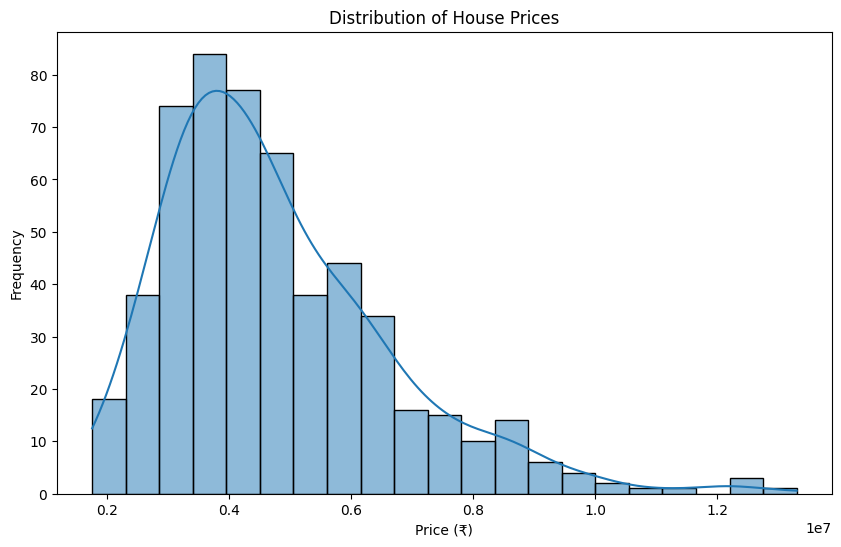

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(10, 6))
sns.histplot(df['price'], kde=True)
plt.title('Distribution of House Prices')
plt.xlabel('Price (₹)')
plt.ylabel('Frequency')
plt.show()

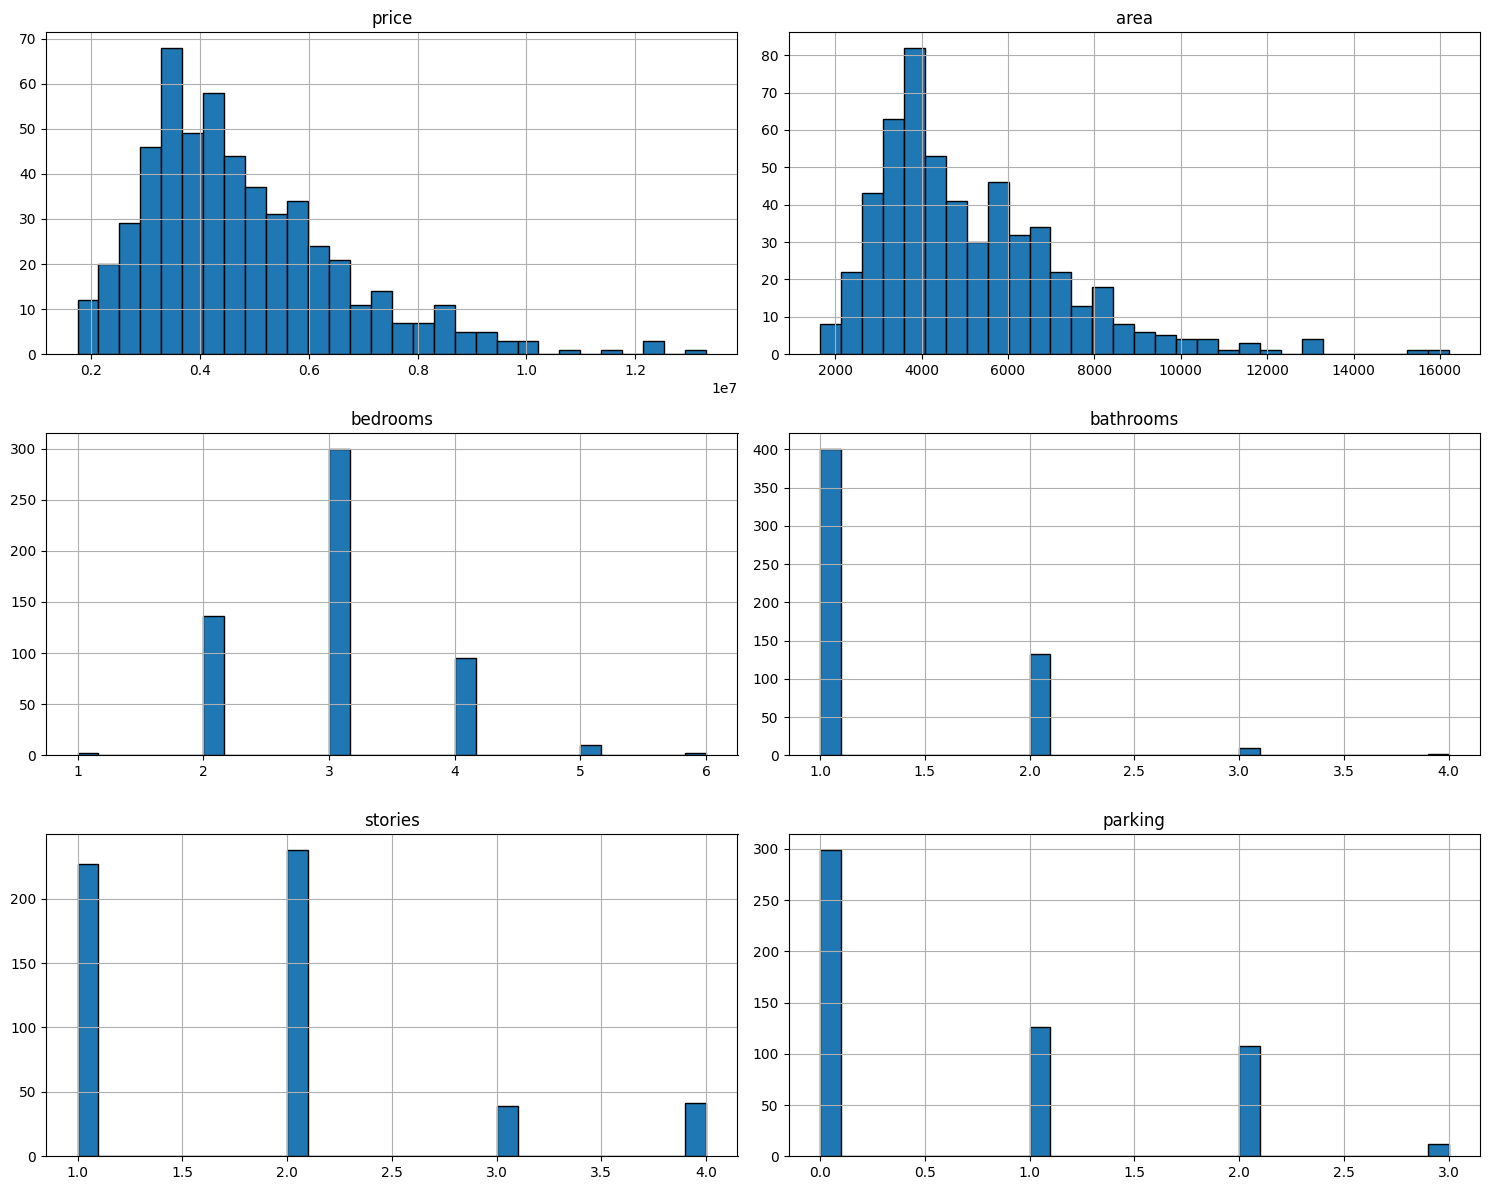

In [10]:
df.hist(figsize=(15, 12), bins=30, edgecolor='black')
plt.tight_layout()
plt.show()

In [11]:
number_columns = df.select_dtypes(include='number').columns
number_columns
object_columns = df.select_dtypes(include='object').columns
object_columns

Index(['mainroad', 'guestroom', 'basement', 'hotwaterheating',
       'airconditioning', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [12]:
binary_columns = ['mainroad', 'guestroom', 'basement', 'hotwaterheating',
                 'airconditioning', 'prefarea']

for col in binary_columns:
    df[col] = df[col].map({'yes': 1, 'no': 0})

df['furnishingstatus'] = df['furnishingstatus'].map({'unfurnished': 0,'semi-furnished': 1,'furnished': 2})


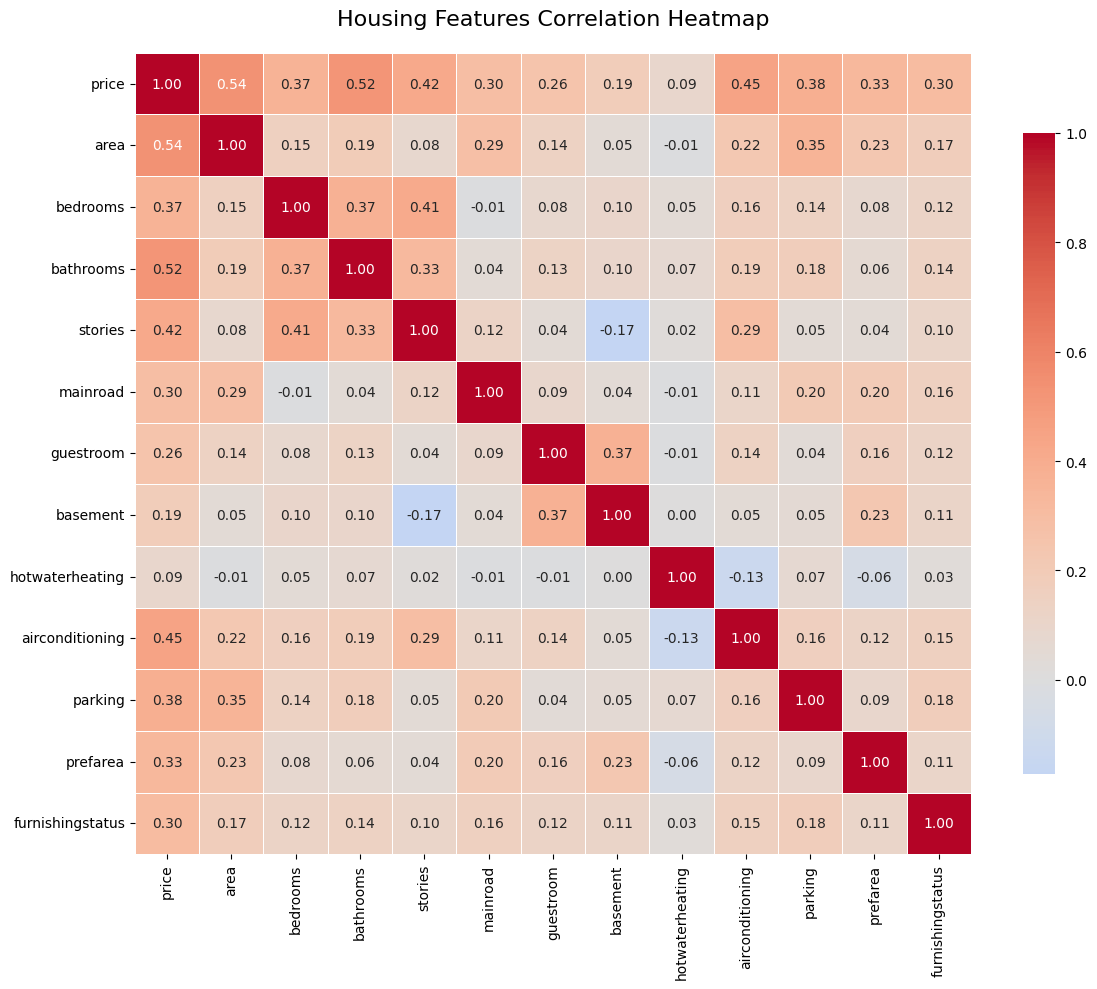

In [13]:
corr = df.corr()

plt.figure(figsize=(12, 10))

sns.heatmap(corr,annot=True, fmt=".2f", cmap='coolwarm',center=0,linewidths=0.5,cbar_kws={"shrink": 0.8})

plt.title('Housing Features Correlation Heatmap', fontsize=16, pad=20)

plt.tight_layout()

plt.show()

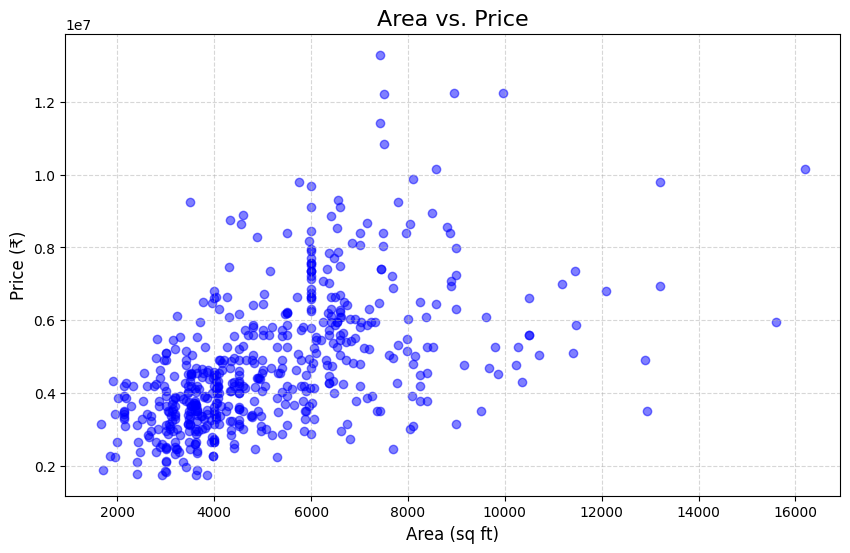

In [14]:
plt.figure(figsize=(10, 6))
plt.scatter(df['area'], df['price'], alpha=0.5, color='blue')
plt.title('Area vs. Price', fontsize=16)
plt.xlabel('Area (sq ft)', fontsize=12)
plt.ylabel('Price (₹)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

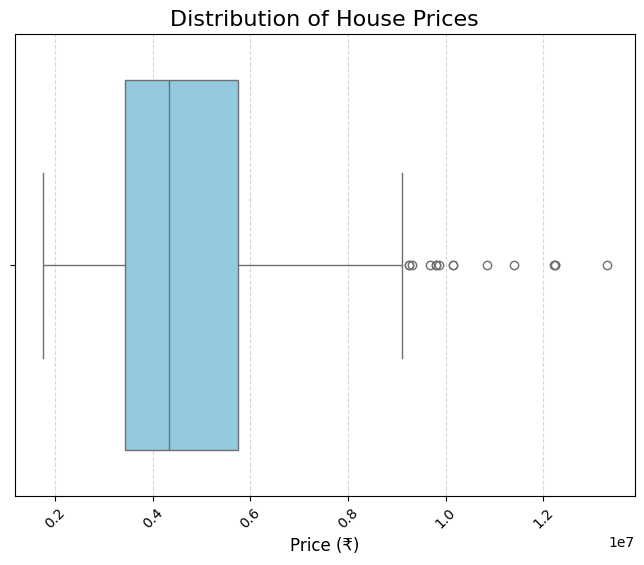

In [15]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['price'], color='skyblue')

plt.title('Distribution of House Prices', fontsize=16)
plt.xlabel('Price (₹)', fontsize=12)
plt.xticks(rotation=45)

plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.show()

In [16]:
df['price_per_sqft'] = df['price'] / df['area']

In [17]:
X = df.drop(['price', 'price_per_sqft'], axis=1)
y = df['price']

In [18]:
categorical_cols = ['furnishingstatus']
numerical_cols = [col for col in X.columns if col not in categorical_cols]

In [19]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

In [20]:
from sklearn.compose import ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)])


In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor

model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))])


In [23]:
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['area', 'bedrooms',
                                                   'bathrooms', 'stories',
                                                   'mainroad', 'guestroom',
                                                   'basement',
                                                   'hotwaterheating',
                                                   'airconditioning', 'parking',
                                                   'prefarea']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['furnishingstatus'])])),
                ('regressor', RandomForestRegressor(random_state=42))])

In [24]:
y_pred = model.predict(X_test)

In [25]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"\nModel Performance:")
print(f"Root Mean Squared Error: {rmse:,.2f}")
print(f"R-squared: {r2:.2f}")



Model Performance:
Root Mean Squared Error: 1,401,049.28
R-squared: 0.61


In [26]:
feature_names = numerical_cols.copy()
ohe_feature_names = model.named_steps['preprocessor'].named_transformers_['cat'].get_feature_names_out(categorical_cols)
feature_names.extend(ohe_feature_names)


In [27]:
importances = model.named_steps['regressor'].feature_importances_

In [28]:
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values('Importance', ascending=False)


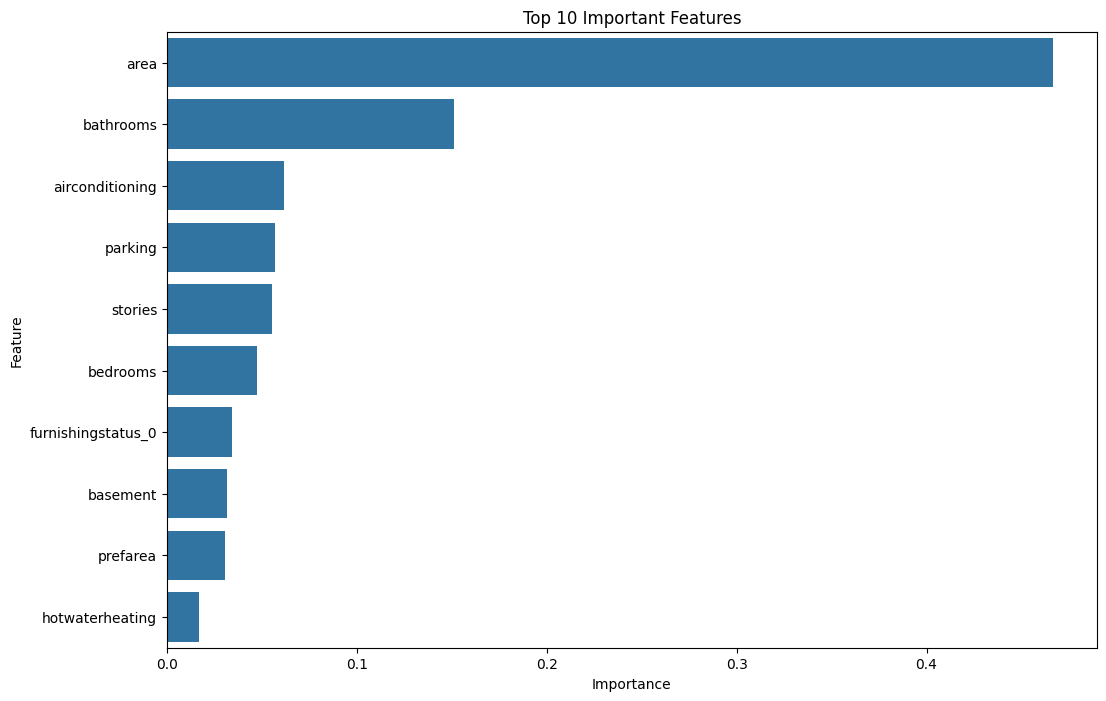

In [29]:
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(10))
plt.title('Top 10 Important Features')
plt.show()

In [30]:
sample_house = {
    'area': [8000],
    'bedrooms': [3],
    'bathrooms': [3],
    'stories': [3],
    'mainroad': [1],
    'guestroom': [0],
    'basement': [0],
    'hotwaterheating': [0],
    'airconditioning': [1],
    'parking': [2],
    'prefarea': [1],
    'furnishingstatus': ['furnished']
}

In [31]:
sample_df = pd.DataFrame(sample_house)
predicted_price = model.predict(sample_df)
print(f"\nPredicted price for sample house: ₹{predicted_price[0]:,.2f}")


Predicted price for sample house: ₹9,810,278.80


In [32]:
from sklearn.metrics import accuracy_score
# Example data
y_true = [0, 1, 0, 1, 0, 1, 1, 0]
y_pred = [1, 1, 0, 1, 0, 0, 1, 0]
# Calculate accuracy score
accuracy = accuracy_score(y_true, y_pred)
# Print the accuracy score
print("Accuracy Score:", accuracy)

Accuracy Score: 0.75
